# Project 1 Revisited

- Solution by: James Irving
- Updated: 11/22/21



# Project 1 - Part 5 <a name='part-5'></a>

- [Assignment Link](https://login.codingdojo.com/m/204/7153/54164)

### Preprocessing

In [1]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
## Load dataset from published web view link
import pandas as pd

fpath ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS6Sn9LaMSc_E1EHQpuRK6BTpKp6h27obTP_dTpAVu_xtoqsge30jBGh9vYlO4DYe-utRKMgMqYChU_/pub?output=csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
## replace inconsistent categories
fat_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)

## Verify 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [4]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df.drop(columns=target).copy()
y = df[target].copy()
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [5]:
## Drop unwanted/inappropriate columns 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2


In [6]:
## Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

#### Making a Preprocessing Pipeline

In [7]:
## Create categorical data selector & test
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [9]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[ cat_selector(X_train)])

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [10]:
## Create numeric data selector & test
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [11]:
# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [12]:
## test num_pipe (optional)
num_pipe.fit_transform(X_train[ num_selector(X_train)])

array([[ 0.81724868, -0.71277507,  1.82810922],
       [ 0.5563395 , -1.29105225,  0.60336888],
       [-0.13151196,  1.81331864,  0.24454056],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674],
       [ 1.76600931, -0.2277552 , -0.38377708],
       [ 0.81724868, -0.95867683, -0.73836105]])

In [13]:

## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1535bcf70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1535d8760>)])

In [14]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

array([[ 1.        ,  0.        ,  0.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [ 0.        ,  1.        ,  0.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [ 0.        ,  1.        ,  0.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 1.        ,  0.        ,  0.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 1.        ,  0.        ,  0.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])

# Project 1 - Final <a name='final'></a>

- [Assignment Link](https://login.codingdojo.com/m/213/7197/54165)

## Instructions

### Model 1 -  linear regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1535bcf70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1535d8760>)])

#### Using a combined preprocessing + modeling pipeline

In [17]:
## Make & Fit the modeling pipeline
pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

## Quick peek at the R^2 value for test data
pipe.score(X_test,y_test)

0.5656219081346785

In [18]:
# Get predictions to use to evaluate model
y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

In [19]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [20]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='test')

Results for training data:
  - R^2 = 0.56
  - RMSE = 1141.432

Results for test data:
  - R^2 = 0.566
  - RMSE = 1094.733



>- The Linear Regression was able to explain ~56% of the variation in our target (R^2 train=056, R^2 test=0.566)
- The RMSE scores were very similar for the training vs test set.
- This model is not a great model, but it is a consistent one. 

### Model 2 - Decision Tree Regressor

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
## Make and fit model
tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor())
tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = tree_pipe.predict(X_train)
y_hat_test = tree_pipe.predict(X_test)

In [23]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='test')

Results for training data:
  - R^2 = 1.0
  - RMSE = 0.0

Results for test data:
  - R^2 = 0.139
  - RMSE = 1541.548



>- The DecisionTreeRegressor was extremely overfit and is not recommended for use/deployment. 
  - The training scores were a perfect R^2 (1.0), and there was no error (RMSE=0.0)
  - Whereas the test data had an R^2 of 0.12 and an RMSE of 1159

### Evaluation

- Overall the best model is by far the simple LinearRegression. It performed equally well on the training and test data. While it's R-Square of 0.56 is not fantastic, it is still far better than 0.11.

- Additionally, LinearRegression coefficients can tell us more about the relationship between the features and our target than a decision tree's feature importances. 

# **Project 1 - Revisited: Importances & Coefficients** [Stack 5]

### Remaking X_train and X_test post-processing

In [24]:
## Create categorical data selector & test
cat_selector = make_column_selector(dtype_include='object')

# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(drop='if_binary',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)

## Create numeric data selector & test
num_selector = make_column_selector(dtype_include='number')

# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe


## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector),
                                       verbose_feature_names_out=False)
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

In [25]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
display(X_train_df.head(3),X_test_df.head(3))

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109
7510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369
5828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541


,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
7503,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.331009,-0.776646,-0.998816
2957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.179892,0.100317,-1.585194
7031,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.378447,-0.482994,-1.595784


In [26]:
from sklearn import metrics
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.3f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.3f}\tRMSE= {rmse_test:.2f}")
    

### LinearRegression

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.560	RMSE= 1141.06
Test Data:	R^2= 0.565	RMSE= 1095.97


#### Extract and visualize the coefficients that your model determined.

In [28]:
coeffs = pd.Series(lin_reg.coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['Intercept'] = lin_reg.intercept_
coeffs.head()

Item_Fat_Content_Regular    5.682693e+01
Item_Type_Baking Goods      2.773388e+15
Item_Type_Breads            2.773388e+15
Item_Type_Breakfast         2.773388e+15
Item_Type_Canned            2.773388e+15
Name: Coefficients, dtype: float64

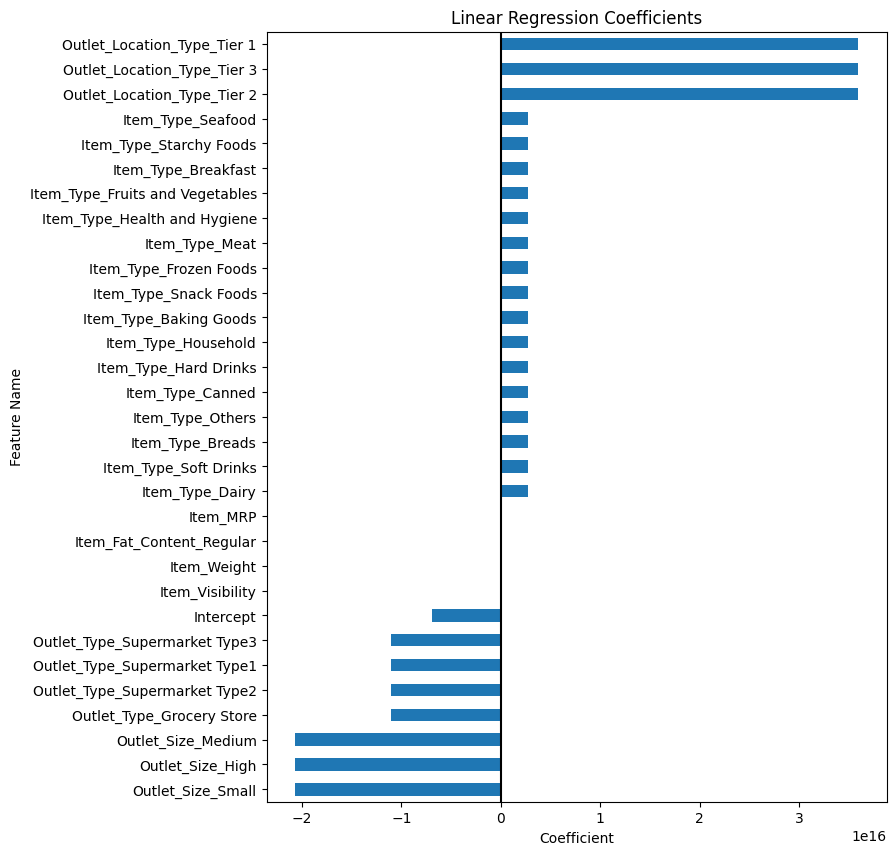

In [29]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,10))
ax.axvline(0,color='k');
ax.set(title='Linear Regression Coefficients', ylabel='Feature Name', 
       xlabel='Coefficient')
fig = ax.get_figure();

In [30]:
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [31]:
coeffs.sort_values(ascending=False)

Outlet_Location_Type_Tier 1        35,953,595,119,773,248.00
Outlet_Location_Type_Tier 3        35,953,595,119,773,244.00
Outlet_Location_Type_Tier 2        35,953,595,119,773,204.00
Item_Type_Seafood                   2,773,387,739,252,171.50
Item_Type_Starchy Foods             2,773,387,739,251,964.00
Item_Type_Breakfast                 2,773,387,739,251,952.00
Item_Type_Fruits and Vegetables     2,773,387,739,251,874.50
Item_Type_Health and Hygiene        2,773,387,739,251,861.50
Item_Type_Meat                      2,773,387,739,251,861.00
Item_Type_Frozen Foods              2,773,387,739,251,857.50
Item_Type_Snack Foods               2,773,387,739,251,857.00
Item_Type_Baking Goods              2,773,387,739,251,856.00
Item_Type_Household                 2,773,387,739,251,853.00
Item_Type_Hard Drinks               2,773,387,739,251,851.50
Item_Type_Canned                    2,773,387,739,251,842.00
Item_Type_Others                    2,773,387,739,251,814.00
Item_Type_Breads        

#### Select the top 3 most impactful features and interpret their coefficients in plain english.



- Outlet_Location_Type_Tier 1:
    - Having Location_Type_Tier 1 increased outlet sales by 35,953,595,119,773,248.00 Rupees.
- Outlet_Location_Type_Tier 3        
    - Having Location_Type_Tier 3 increased outlet sales by 35,953,595,119,773,244.00 Rupees.
- Outlet_Location_Type_Tier 2       
    - Having Location_Type_Tier 2 increased outlet sales by  35,953,595,119,773,204.00 Rupees.

- Save your figure as a .png file inside of your repository (you will need this for the final piece of this assignment - Update Your README).

In [32]:
fig.savefig('images/solution_core_1_coeffs.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_1_coeffs.png)

### ~~DecisionTreeRegressor~~ RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:

tree_reg = RandomForestRegressor()#DecisionTreeRegressor()
tree_reg.fit(X_train_df, y_train)
evaluate_regression(tree_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.938	RMSE= 429.94
Test Data:	R^2= 0.535	RMSE= 1133.05


#### Extract and visualize the feature importances that your model determined.

In [35]:
importances = pd.Series(tree_reg.feature_importances_, index=feature_names,
                        name='Feature Importances')
importances.head()

Item_Fat_Content_Regular   0.01
Item_Type_Baking Goods     0.00
Item_Type_Breads           0.00
Item_Type_Breakfast        0.00
Item_Type_Canned           0.00
Name: Feature Importances, dtype: float64

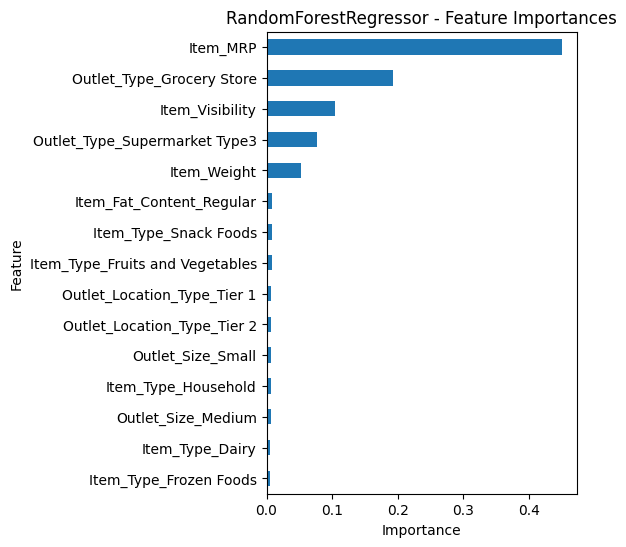

In [36]:
ax = importances.sort_values().tail(15).plot(kind='barh',figsize=(4,6))
ax.set(title='RandomForestRegressor - Feature Importances', ylabel='Feature', 
      xlabel='Importance');
fig = ax.get_figure()

#### Identify the top 5 most important features.

- The top 5 most important features were:
    - Item_MRP
    - Outlet_Type_Grocery_Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

Save your figure as a .png file inside of your repository  (you will need this for the final piece of this assignment - Update Your README).

In [37]:
fig.savefig('images/solution_core_1_importances.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_1_importances.png)

# (Core #2) Project 1 Revisited: Global Explanations

<h2>Task</h2>
<ul><li>For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.</li></ul><h3>Project 1 Revisited - Part 2: Global Explanations<br><a href="http://localhost:8889/notebooks/ASSIGNMENTS/06_Core%203%20-%20Project%201%20(Explained!).ipynb#Part-2:-Apply-Model-Explainers" class="anchor-link" target="_blank"></a></h3><p>Using your tree-based model, create your model explainer, calculate your shap values, and produce:</p><ul><li>1) a summary plot - with plot_type='bar':<ul><li>In a Markdown cell below, compare the most important features according to SHAP vs. your feature importance.&nbsp;<ul><li>Are they the same features in both? If not, whats different?</li></ul></li></ul><ul><li>Save your figure as a .png file inside of your repository&nbsp;&nbsp;(you will need this for the final piece of this assignment - Update Your README).</li></ul></li></ul><ul><li>2) a summary plot - with plot_type='dot'<ul><li>In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.</li></ul><ul><li>Save your figure as a .png file inside of your repository&nbsp;&nbsp;(you will need this for the final piece of this assignment - Update Your README).</li></ul></li></ul>
<h3>Update your README.<a href="http://localhost:8889/notebooks/ASSIGNMENTS/06_Core%203%20-%20Project%201%20(Explained!).ipynb#Part-3:-Update-your-README." class="anchor-link" target="_blank"></a></h3>
<ul><li>Insert your exported figures and corresponding interpretations from above into your README file. You should have:<ul><li>a summary plot - bar version<ul><li>&nbsp;Your comparison of most important features found by shap vs feature importance.</li></ul></li><li>a summary plot - dot version<ul><li>Your interpretation of the top 3 most important features and how they influence your model's predictions.</li></ul></li></ul></li></ul>
<p>Submit the link to your project repository.</p><p><br></p><p><br></p>
        
        
        
        </div>

## SOLUTION 

### Global Model Explanations

In [38]:
import shap
shap.initjs()

In [39]:
X_train_df.shape, X_test_df.shape

((6392, 30), (2131, 30))

In [40]:
X_shap = shap.sample(X_train_df, nsamples=200,random_state=321)
X_shap

,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
3888,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.70,0.87,-1.68
2497,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.52,0.42,1.28
7723,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.09,-0.99,0.68
8117,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,-0.50,-0.32,1.62
7475,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.50,-0.41,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.65,-0.39,-0.24
3230,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.88,1.10,-0.67
2341,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.18,0.23,-1.39
823,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.54,-0.63,-0.49


In [41]:
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.01
2497     663.14
7723   2,766.40
8117   1,225.07
7475   1,685.81
         ...   
4033   1,771.03
3230   1,416.82
2341   1,301.64
823    1,856.25
6159     697.09
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [42]:
explainer = shap.Explainer(tree_reg, X_shap)
shap_values = explainer(X_shap,y_shap)

#### Shap Summary Plot - Bar

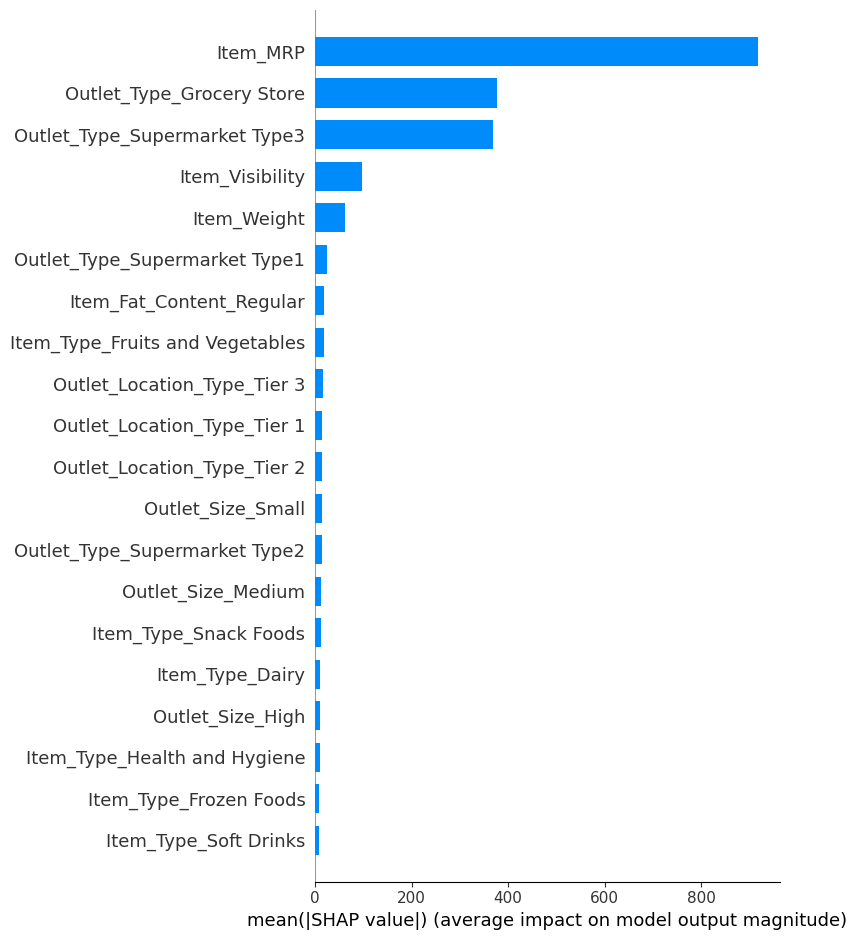

Text(0.5, 1.0, 'Summary Plot - Outlet Sales')

In [43]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, plot_type='bar')
ax.set_title('Summary Plot - Outlet Sales')

- Comparing the top 5 most important features according to SHAP vs. your RandomForest:
    - The top 5 most important features were the same according to Shap vs the RandomForest. 
    - However, the order was slightly different (Item_Visibility is 4th according to shap instead of 3rd).

- Save your figure as a .png file inside of your repository  (you will need this for the final piece of this assignment - Update Your README).

In [44]:
fig.savefig('images/solution_core_2_summary-bar.png',transparent=False, bbox_inches='tight')

- Testing inserting saved image into markdown:
![png](images/solution_core_2_summary-bar.png)

#### Shap Summary Plot - Dot

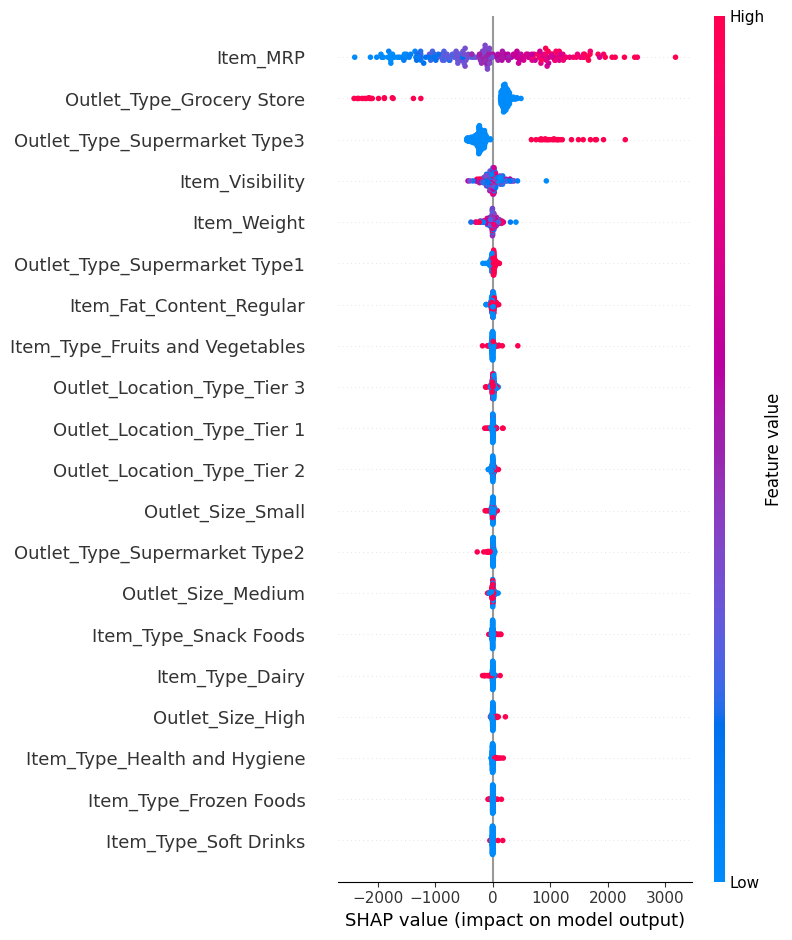

Text(0.5, 1.0, 'Summary Plot - Dot')

In [45]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values)
ax.set_title('Summary Plot - Dot')

- The top 3 most important features and their effects were the following:
    1. Item_MRP: The higher the MRP, the higher the predicted sales.
    2. Outlet_Type_Grocery Store: Being a grocery store dramatically reduces predicted sales.
    3. Outlet_Type_Supermarket Type3:  Being a supermarket type 3 dramatically increased the predicted sales.

In [46]:
fig.savefig('images/solution_core_2_summary-dot.png',transparent=False, bbox_inches='tight')

- Testing inserting saved image into markdown:
![png](images/solution_core_2_summary-dot.png)